In [48]:
import time

from scipy import stats
import numpy as np
from scipy.fft import fft, fftfreq, fftshift, ifft, ifftshift
from matplotlib import pyplot as plt

import utils

using formula

In [49]:
t_0 = 1/2

def g(t):
    return np.where(abs(t) < t_0, 1, 0)

def g_f(v):
    return np.sinc(v)

using trapz

In [50]:
def numerical_fourier(t, signal, nu):
    result = np.zeros_like(nu, dtype=complex)
    for i, freq in enumerate(nu):
        result[i] = np.trapezoid(signal * np.exp(-2j * np.pi * freq * t), t)
    return result

def numerical_inverse(nu, fourier, t):
    result = np.zeros_like(t, dtype=complex)
    for i, time in enumerate(t):
        result[i] = np.trapezoid(fourier * np.exp(2j * np.pi * nu * time), nu)
    return result

fft

In [51]:
def unitary_fft(signal, dt):
    N = len(signal)
    nu = np.fft.fftfreq(N, dt)
    fourier = np.fft.fft(signal) * dt
    return nu, fourier

def unitary_ifft(fourier, dt):
    return np.fft.ifft(fourier) / dt

# def unitary_fft(signal, dt):
#     N = len(signal)
#     nu = fftshift(fftfreq(N, dt))
#     return nu, fftshift(fft(signal)) / np.sqrt(N)
# 
# def unitary_ifft(fourier, dt):
#     N = len(fourier)
#     return ifft(ifftshift(fourier)) * np.sqrt(N)

# def unitary_fft(signal, dt):
#     N = len(signal)
#     nu = fftshift(fftfreq(N, dt))
#     return nu, fftshift(fft(signal)) / N**0.5
# 
# def unitary_ifft(fourier, dt):
#     N = len(fourier)
#     return ifft(ifftshift(fourier)) * N**0.5

corrected fft

In [52]:
# def continuous_approx_fft(t, signal, T):
#     N = len(t)
#     dt = t[1] - t[0]
#     
#     nu = fftshift(np.fft.fftfreq(N, dt))
#     
#     c = dt * np.exp(-2j * np.pi * nu * T)
#     
#     fft_vals = fft(signal)
#     fourier = fftshift(c * fft_vals)
#     
#     return nu, fourier

def continuous_approx_fft(signal, dt):
    N = len(signal)
    fft_vals = fftshift(fft(ifftshift(signal))) * dt
    nu = fftshift(fftfreq(N, dt))
    return nu, fft_vals

def continuous_approx_ifft(fourier, dt):
    ifft_vals = ifftshift(ifft(fftshift(fourier))) / dt
    return ifft_vals

# def continuous_approx_ifft(nu, fourier, T):
#     N = len(nu)
#     dnu = nu[1] - nu[0]
#     
#     t = ifftshift(np.fft.fftfreq(N, dnu))
#     c_inv = np.exp(-1j * np.pi * nu * T) / (N * dnu)
#     
#     restored = ifft(ifftshift(fourier * c_inv))
#     
#     return t, restored

plots 1.1

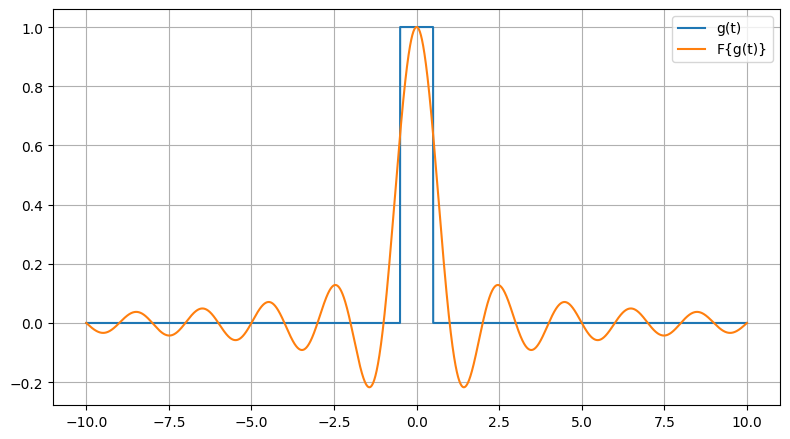

In [53]:
def part_1():
    t = np.linspace(-10, 10, 5000)
    gt = g(t)
    gf = g_f(t)
    
    plt.figure(figsize=(8, 4.5))
    plt.plot(t, gt, label="g(t)")
    plt.plot(t, gf, label="F{g(t)}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
part_1()


hq_t = np.linspace(-5, 5, 500)
hq_nu = np.linspace(-5, 5, 500)
hq_g = g(hq_t)
hq_g_f = g_f(hq_nu)

trapz

C:\Users\kisik\AppData\Local\Temp\ipykernel_10136\1764413390.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\kisik\AppData\Local\Temp\ipykernel_10136\1764413390.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fourier_fig.show()


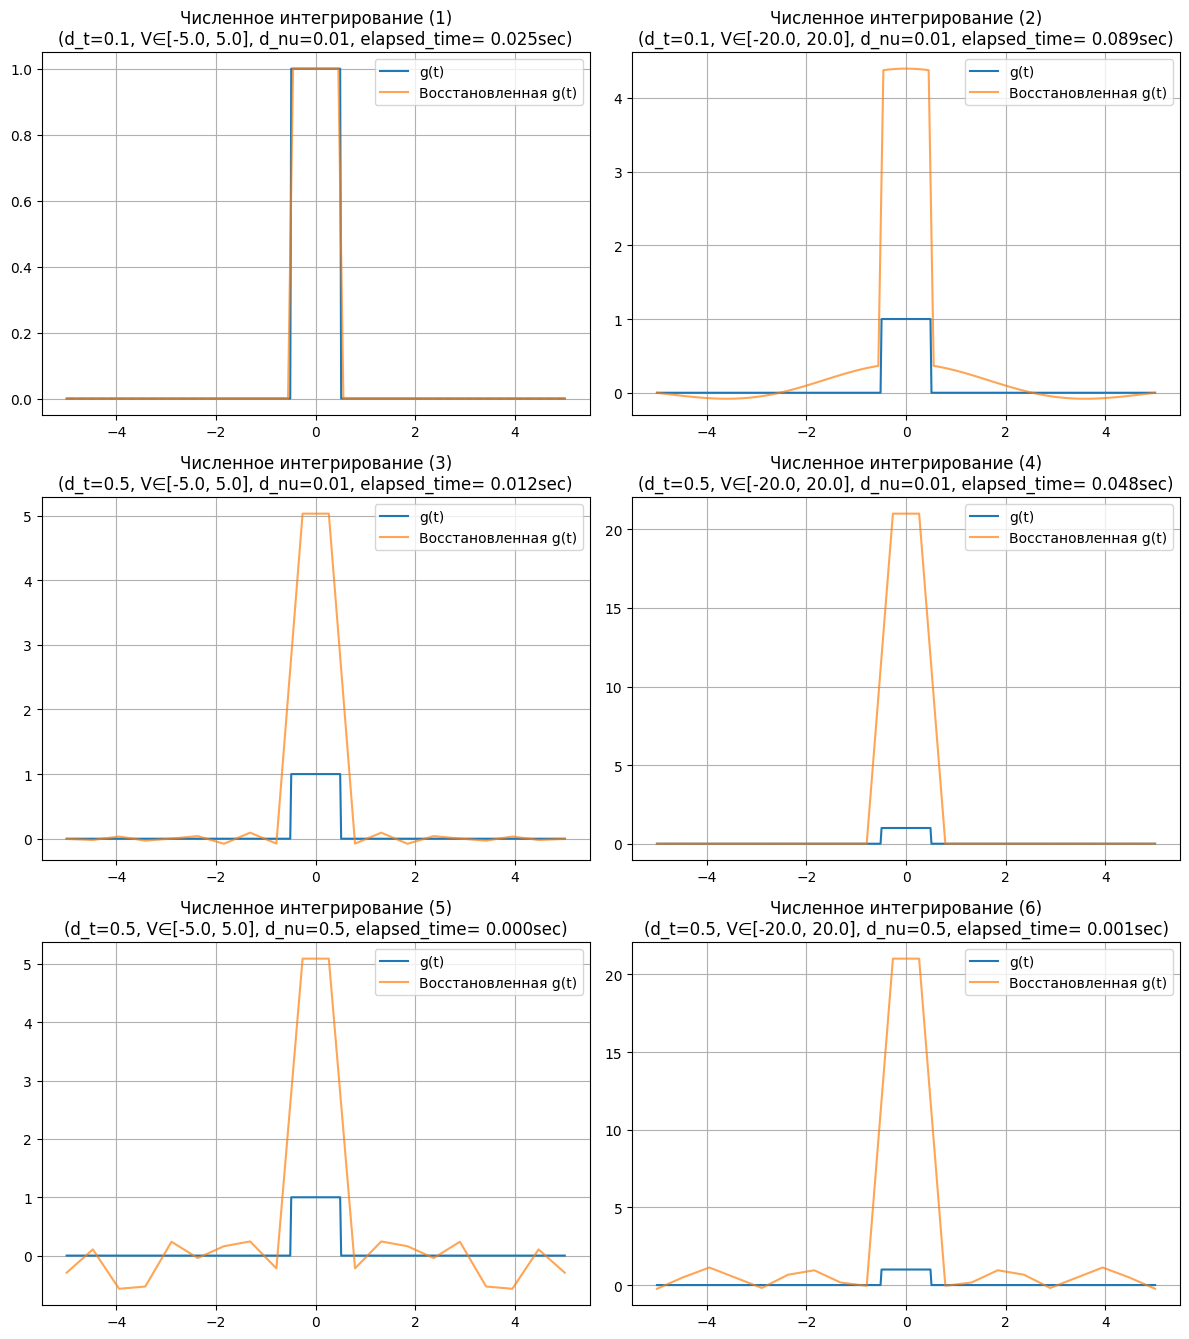

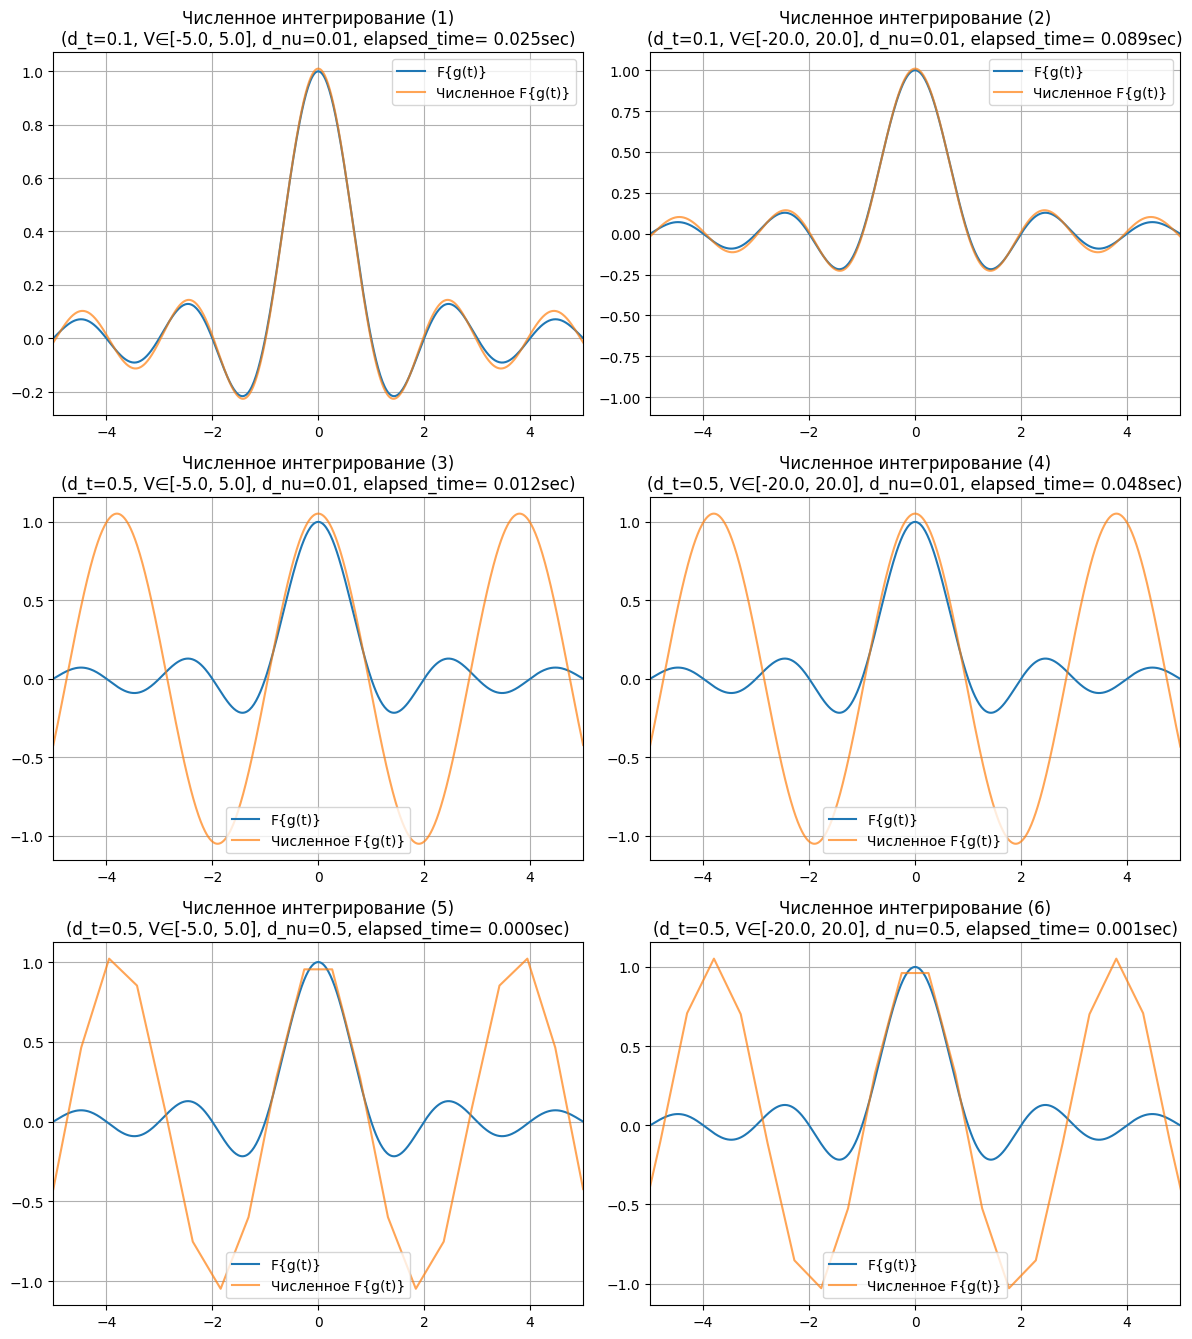

In [54]:
def part_1_1():
    t_max = 5
    
    vals = [
        (0.1, 10, 0.01),
        (0.1, 40, 0.01),
        (0.5, 10, 0.01),
        (0.5, 40, 0.01),
        (0.5, 10, 0.5),
        (0.5, 40, 0.5),
    ]
    size = (int(len(vals)/2), 2)
    fig = plt.figure(figsize=(12, 4.5*size[0]))
    fourier_fig = plt.figure(figsize=(12, 4.5*size[0]))
    
    for i, (d_t, V, d_nu) in enumerate(vals):
        start_time = time.time()
        
        t = np.linspace(-t_max, t_max, int(2 * t_max / d_t))
        nu = np.linspace(-V/2, V/2, int(V / d_nu))
        
        fourier = numerical_fourier(t, g(t), nu)
        restored = numerical_inverse(nu, fourier, t)
        
        elapsed_time = time.time() - start_time
        
        ax = fig.add_subplot(size[0], size[1], i+1)
        ax.plot(hq_t, hq_g.real, label="g(t)")
        ax.plot(t, restored.real, label="Восстановленная g(t)", alpha=0.7)
        ax.grid(True)
        title = f'Численное интегрирование ({i+1})\n({d_t=}, V∈[{-V / 2}, {V / 2}], {d_nu=}, {elapsed_time=: .3f}sec)'
        ax.set_title(title)
        ax.legend()
        
        ax = fourier_fig.add_subplot(size[0], size[1], i+1)
        ax.plot(hq_nu, hq_g_f.real, label="F{g(t)}")
        ax.plot(nu, fourier.real, label="Численное F{g(t)}", alpha=0.7)
        ax.set_xlim(-t_max, t_max)
        ax.grid(True)
        ax.set_title(title)
        ax.legend()
        
    fig.tight_layout()
    fig.show()
    
    fourier_fig.tight_layout()
    fourier_fig.show()
part_1_1()

Fast-Fourier-Transform

Оригинальная энергия: 1.0256410256410255
Энергия после преобразований: 0.7483153767850796
Оригинальная энергия: 1.0005002501250573
Энергия после преобразований: 0.9949878675327
Оригинальная энергия: 0.8421052631578948
Энергия после преобразований: 0.6139942745863296
Оригинальная энергия: 0.8008008008008005
Энергия после преобразований: 0.7967842882636464
Оригинальная энергия: 1.1428571428571428
Энергия после преобразований: 0.6218592167691146
Оригинальная энергия: 1.0025062656641595
Энергия после преобразований: 0.9949384704502282


C:\Users\kisik\AppData\Local\Temp\ipykernel_10136\34317455.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\kisik\AppData\Local\Temp\ipykernel_10136\34317455.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fourier_fig.show()


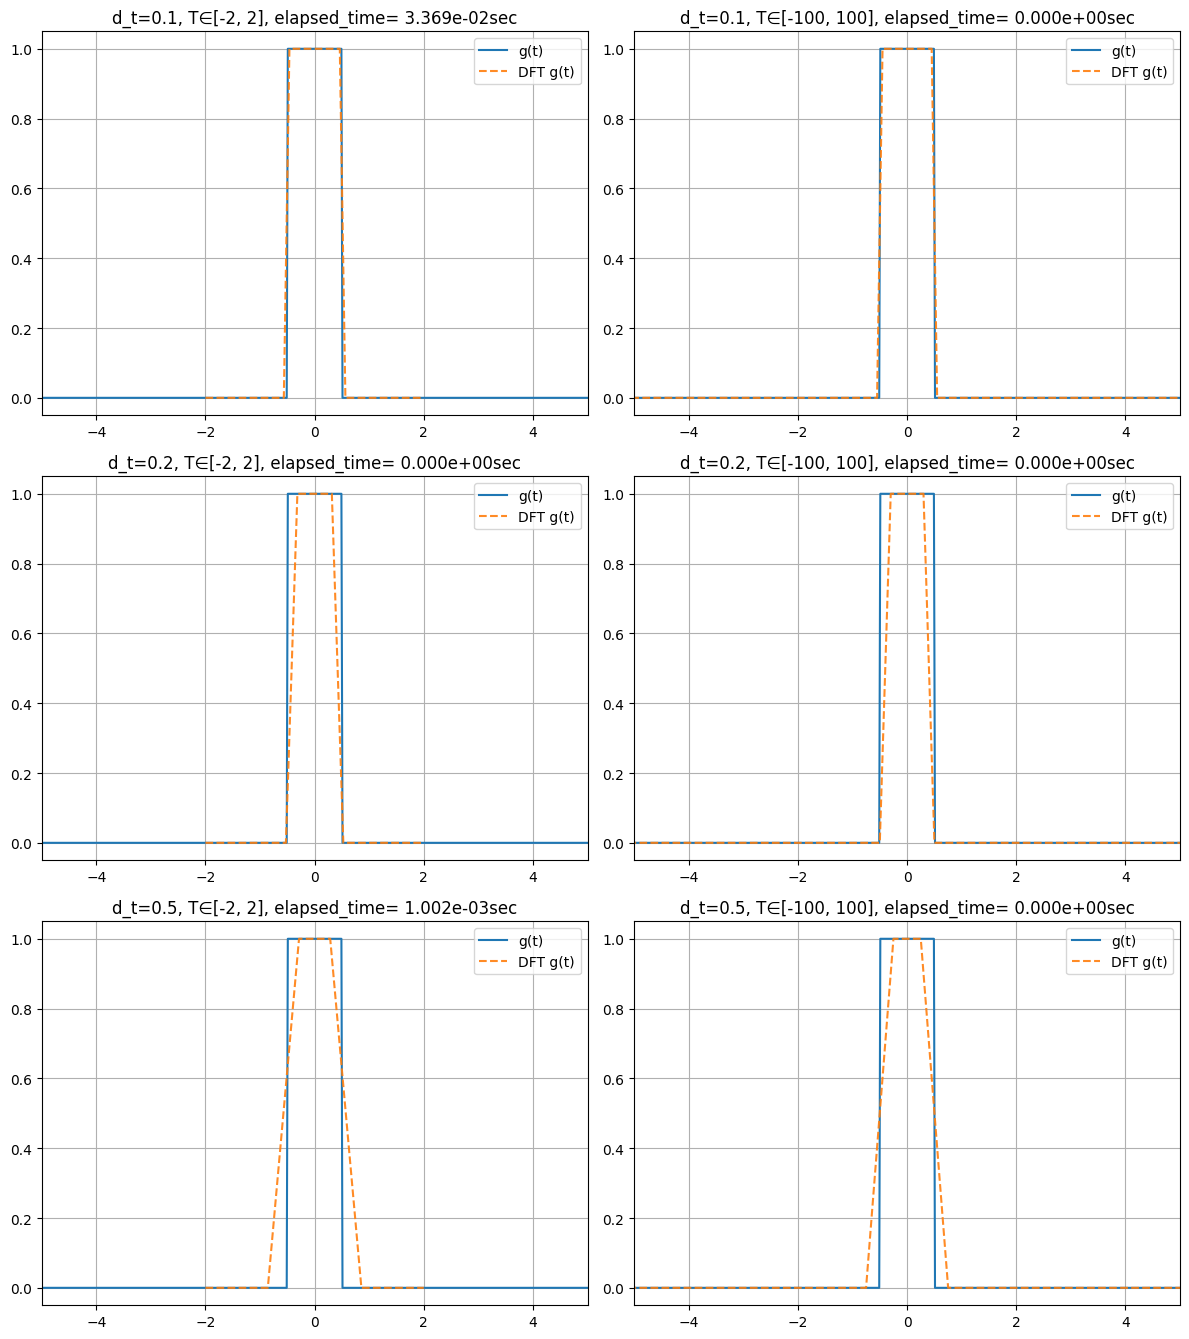

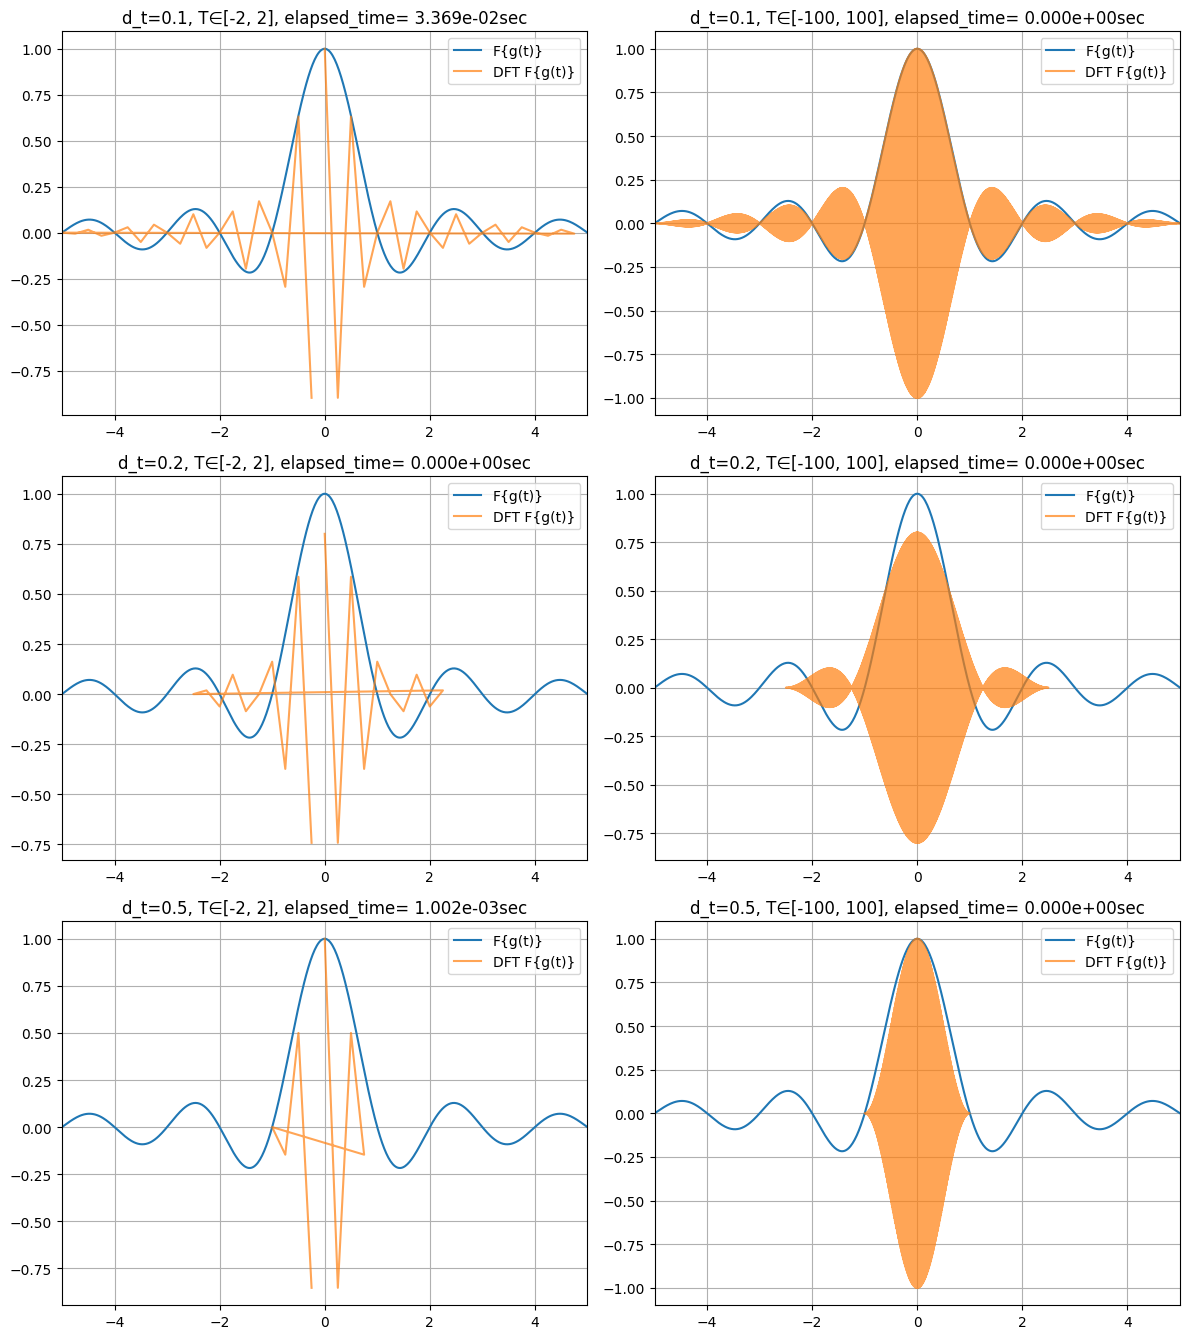

In [55]:
def part_1_2():
    t_max = 5
    
    vals = [
        (0.1, 2),
        (0.1, 100),
        (0.2, 2),
        (0.2, 100),
        (0.5, 2),
        (0.5, 100),
    ]
    size = (int(len(vals)/2), 2)
    fig = plt.figure(figsize=(12, 4.5*size[0]))
    fourier_fig = plt.figure(figsize=(12, 4.5*size[0]))
    
    for i, (d_t, T) in enumerate(vals):
        start_time = time.time_ns()
        
        N = int(2 * T / d_t)
        t = np.linspace(-T, T, N)
        g_vals = g(t)
        
        nu, fourier = unitary_fft(g_vals, d_t)
        restored = unitary_ifft(fourier, d_t)
        
        print("Оригинальная энергия:", np.trapezoid(np.abs(g_vals)**2, t))
        print("Энергия после преобразований:", np.trapezoid(np.abs(fourier)**2, nu))
        
        elapsed_time = (time.time_ns() - start_time) / 10**9
        
        ax = fig.add_subplot(size[0], size[1], i+1)
        ax.plot(hq_t, hq_g.real, label="g(t)")
        ax.plot(t, restored.real, label="DFT g(t)", alpha=0.9, linestyle='--')
        ax.set_xlim(-t_max, t_max)
        ax.grid(True)
        title = f'{d_t=}, T∈[{-T}, {T}], {elapsed_time=: .3e}sec'
        ax.set_title(title)
        ax.legend()
        
        ax = fourier_fig.add_subplot(size[0], size[1], i+1)
        ax.plot(hq_nu, hq_g_f.real, label="F{g(t)}")
        ax.plot(nu, fourier.real, label="DFT F{g(t)}", alpha=0.7)
        ax.set_xlim(-t_max, t_max)
        ax.grid(True)
        ax.set_title(title)
        ax.legend()
        
    fig.tight_layout()
    fig.show()
    
    fourier_fig.tight_layout()
    fourier_fig.show()
part_1_2()

C:\Users\kisik\AppData\Local\Temp\ipykernel_10136\2103518143.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\kisik\AppData\Local\Temp\ipykernel_10136\2103518143.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fourier_fig.show()


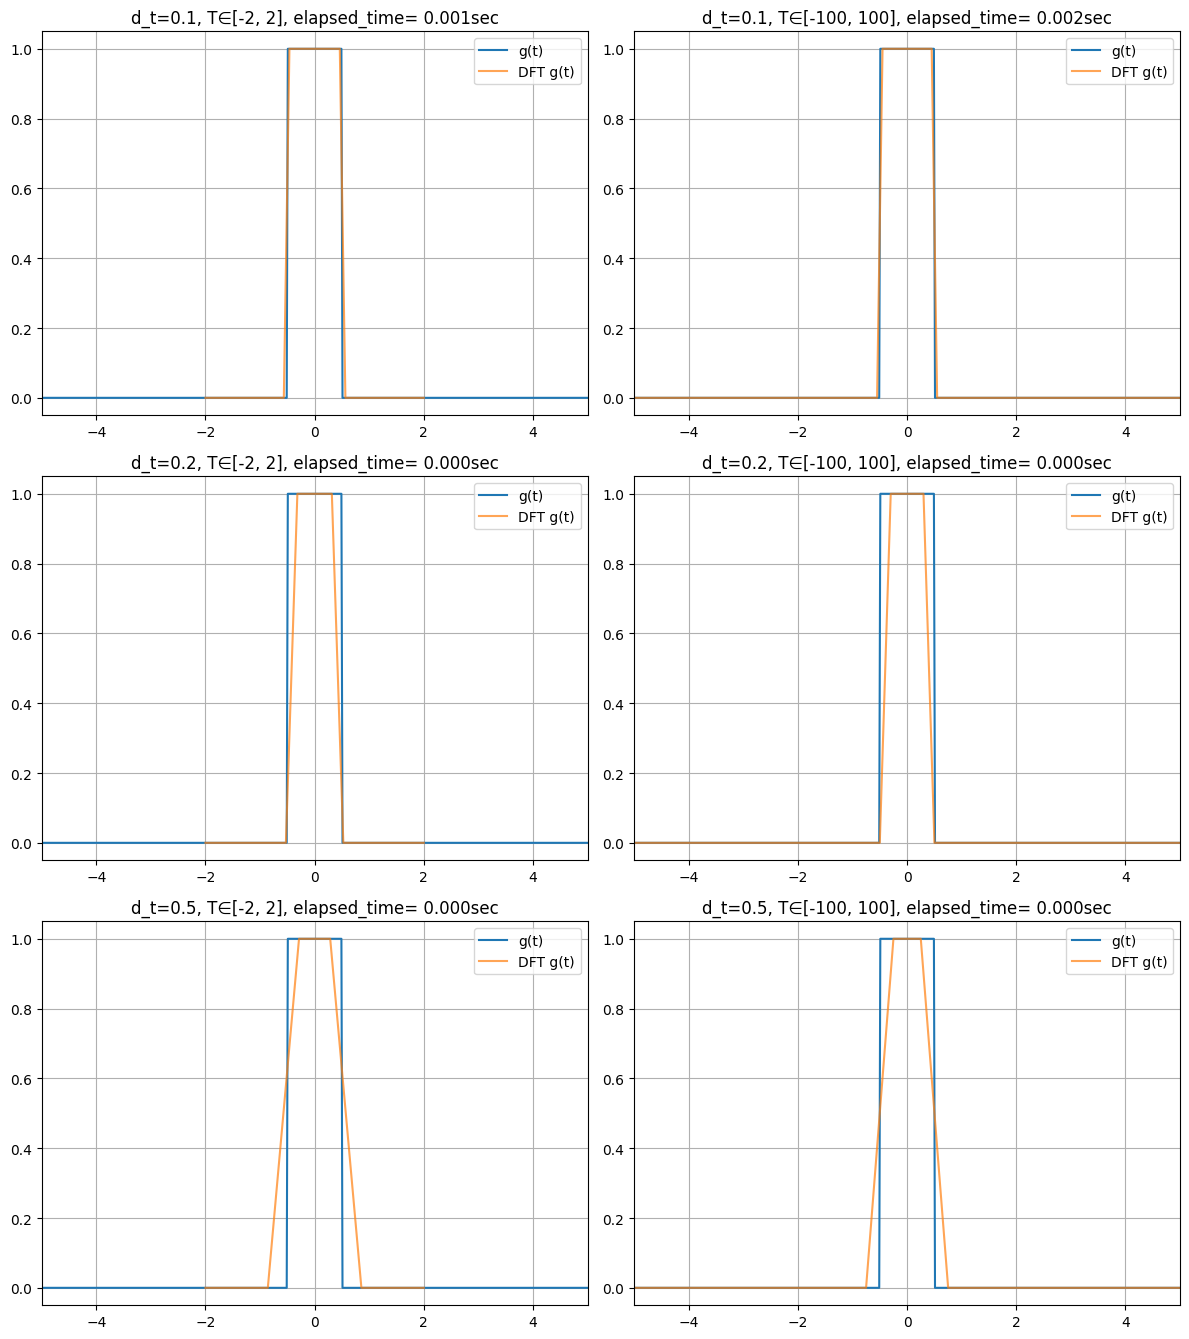

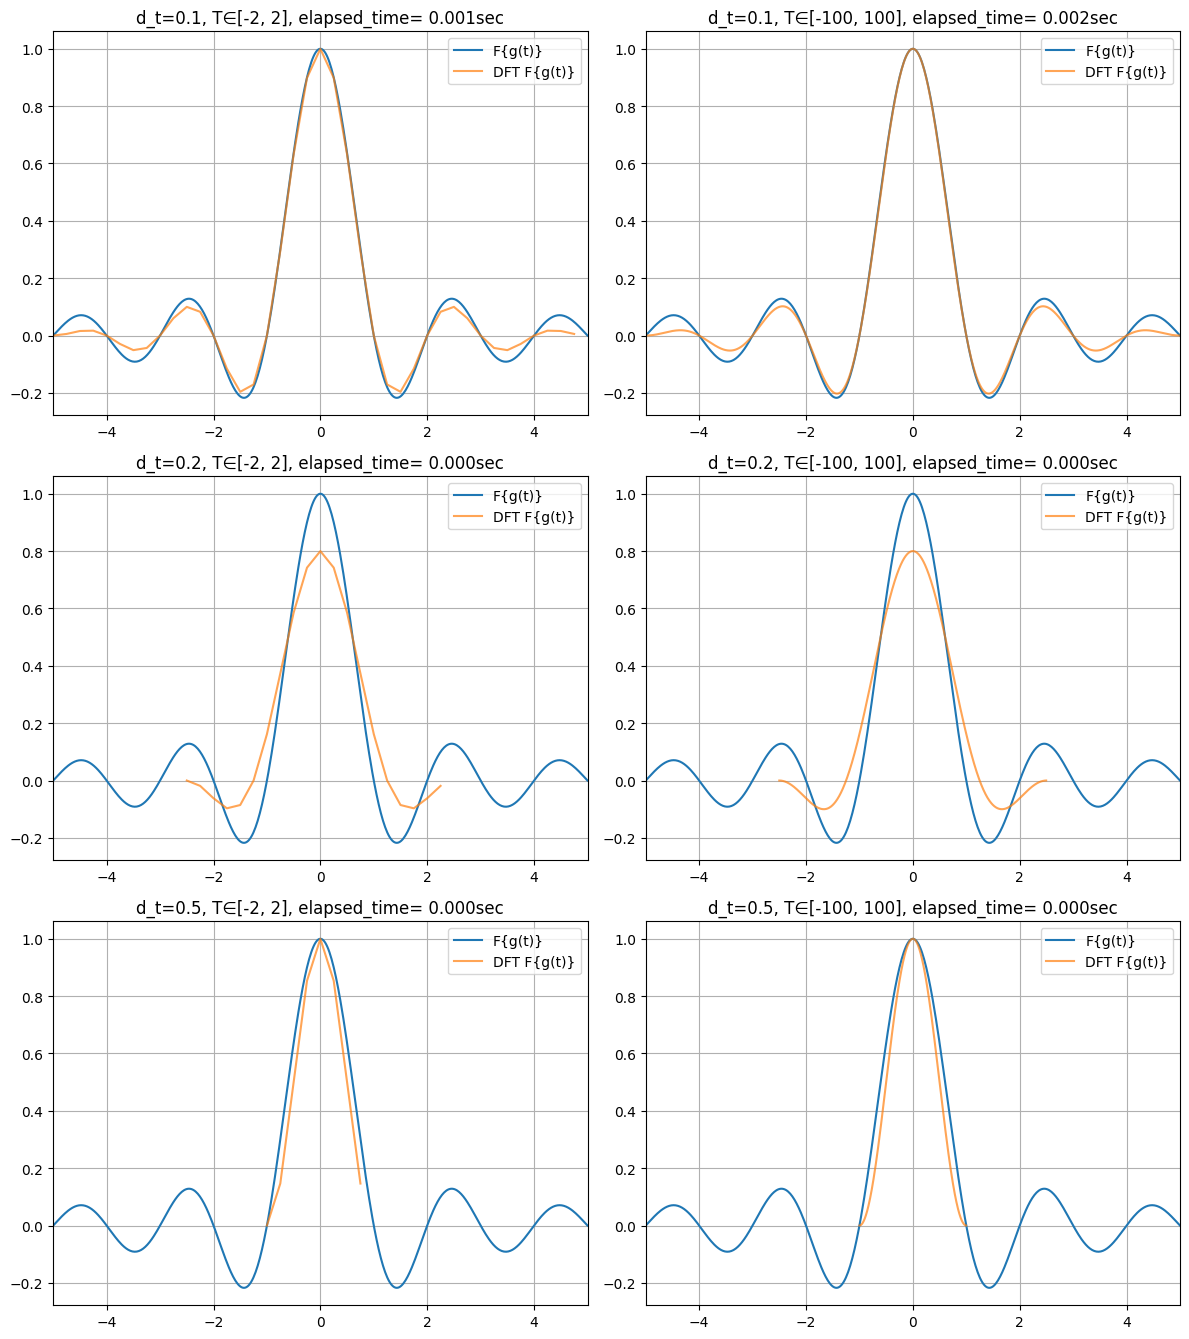

In [57]:
def part_1_3():
    t_max = 5
    
    vals = [
        (0.1, 2),
        (0.1, 100),
        (0.2, 2),
        (0.2, 100),
        (0.5, 2),
        (0.5, 100),
    ]
    size = (int(len(vals)/2), 2)
    fig = plt.figure(figsize=(12, 4.5*size[0]))
    fourier_fig = plt.figure(figsize=(12, 4.5*size[0]))
    
    for i, (d_t, T) in enumerate(vals):
        start_time = time.time() 
        
        t = np.linspace(-T, T, int(2 * T / d_t))
        g_vals = g(t)
        
        nu, fourier = continuous_approx_fft(g_vals, d_t)
        restored = continuous_approx_ifft(fourier, d_t)
        
        elapsed_time = time.time() - start_time
        
        ax = fig.add_subplot(size[0], size[1], i+1)
        ax.plot(hq_t, hq_g.real, label="g(t)")
        ax.plot(t, restored.real, label="DFT g(t)", alpha=0.7)
        ax.set_xlim(-t_max, t_max)
        ax.grid(True)
        title = f'{d_t=}, T∈[{-T}, {T}], {elapsed_time=: .3f}sec'
        ax.set_title(title)
        ax.legend()
        
        ax = fourier_fig.add_subplot(size[0], size[1], i+1)
        ax.plot(hq_nu, hq_g_f.real, label="F{g(t)}")
        ax.plot(nu, fourier.real, label="DFT F{g(t)}", alpha=0.7)
        ax.set_xlim(-t_max, t_max)
        ax.grid(True)
        ax.set_title(title)
        ax.legend()
        
    fig.tight_layout()
    fig.show()
    
    fourier_fig.tight_layout()
    fourier_fig.show()
part_1_3()